<a href="https://colab.research.google.com/github/HedersonSantos/jpx_tokyo/blob/main/jpx_tokyo_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import io, re, os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#import jpx_tokyo_market_prediction
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

In [19]:
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab\ Notebooks/
path = '/gdrive/My Drive/Colab Notebooks'


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks


In [ ]:
dados = pd.read_csv('stock_prices.csv')
dados.head(3)

In [20]:
colunas=['Open','High','Low','Close','Volume']
alvo=['Target']
dados = dados[~dados['Target'].isna()]
dados = dados[~dados['Open'].isna()]
dados = dados[dados['Date']>='2021-01-01 00:00:00']
print(dados.shape)


(450931, 12)


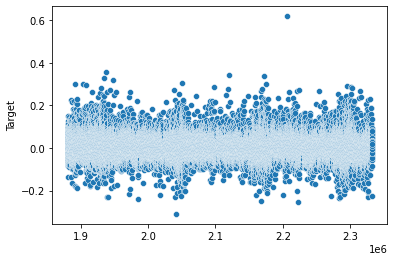

In [21]:
sns.scatterplot( x=dados.index, y=dados.Target)


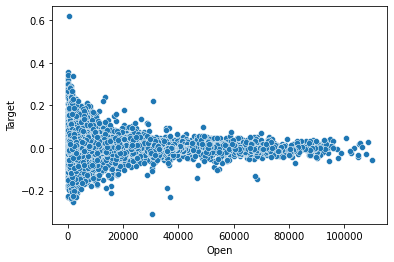

In [22]:
#sns.pairplot(dados[(','.join(colunas) + ',Target').split(',')])
#plt.show()
sns.scatterplot( x=dados.Open, y=dados.Target)


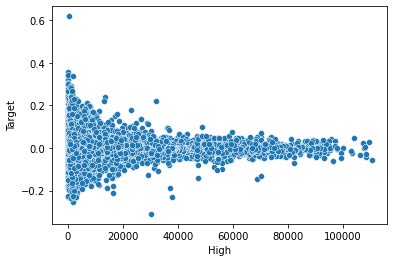

In [23]:
sns.scatterplot( x=dados.High, y=dados.Target)

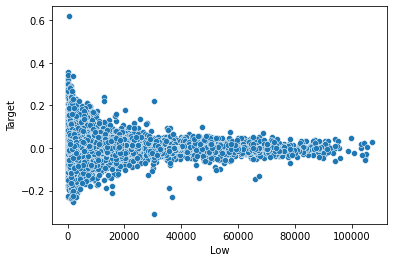

In [24]:
sns.scatterplot( x=dados.Low, y=dados.Target)

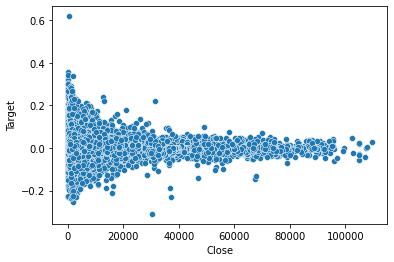

In [25]:
sns.scatterplot( x=dados.Close, y=dados.Target)

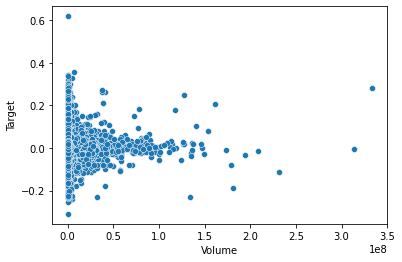

In [26]:
sns.scatterplot( x=dados.Volume, y=dados.Target)

In [27]:
dados[colunas].corr('pearson')

,Open,High,Low,Close,Volume
Open,1.000000,0.999878,0.999866,0.999747,-0.027908
High,0.999878,1.000000,0.999810,0.999872,-0.027545
Low,0.999866,0.999810,1.000000,0.999885,-0.028184
Close,0.999747,0.999872,0.999885,1.000000,-0.027852
Volume,-0.027908,-0.027545,-0.028184,-0.027852,1.000000


In [28]:
X = dados[colunas].values
y = dados[alvo]
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)
X_treino.shape, X_teste.shape

((360744, 5), (90187, 5))

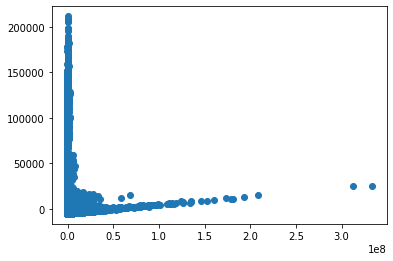

In [30]:
pca_proj=PCA(n_components=2)
X_2d=pca_proj.fit_transform(X_treino)
X_teste2d = pca_proj.fit_transform(X_teste)

plt.scatter(X_2d[:,0],X_2d[:,1])

In [ ]:
#simulating the best number of estimator for ExtraTreesRegressor
vscore = []
vn = []
vr2=[]
for n in range(1,100,10):
    model = ExtraTreesRegressor(n_estimators=n, random_state= 123)
    model.fit(X_2d,y_treino)
    y_pred = model.predict(X_teste2d) 
    score = mean_squared_error(y_pred, y_teste)
    rmse =  mean_squared_error(y_pred, y_teste, squared=False)
    mae = mean_absolute_error(y_pred, y_teste)
    print('Number of Estimators:', n, 'mse:', score, 'rmse:', rmse)
    vscore.append(score)
    vn.append(n)
    vr2.append(mae)
best_n = vn[np.argmin(vscore)]
print('Melhor n:', best_n, ' com mse:', vscore[np.argmin(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(vn, vr2, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MAE', fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Number of Estimators: 1 mse: 0.001034540997183901 rmse: 0.032164281387649575


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Number of Estimators: 11 mse: 0.000627121917059408 rmse: 0.025042402381948263


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Number of Estimators: 21 mse: 0.0006072634261657851 rmse: 0.024642715478732962


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Number of Estimators: 31 mse: 0.0005996001066438762 rmse: 0.024486733278325963


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Number of Estimators: 41 mse: 0.0005960249155900064 rmse: 0.02441362151730067


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Number of Estimators: 51 mse: 0.0005944279804950489 rmse: 0.024380893759151836


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
